# Chapter #1 HW Problems

In [3]:
import sympy as sp
sp.init_printing(use_latex='mathjax')
from IPython.display import display

In [4]:
omega = sp.Symbol('omega', real = True)
omegad = sp.Symbol('omega_d', real = True)
t = sp.Symbol('t', real = True)
A = sp.Symbol('A', real = True)
zeta = sp.Symbol('zeta', real = True)

### Problem 1  
**Use Euler equations to represent $x(t) = A\ e^{-\zeta\omega_n t}\ sin(\omega_d t)$**  

**This problem done in sympy just to test out using the 'rewrite' function.**

In [5]:
x=A*sp.exp(-zeta*omega*t)*sp.sin(omegad*t)
#use rewrite function to express in terms of exponentials
x.rewrite(sp.exp).expand()

       ⅈ⋅ω_d⋅t  -ω⋅t⋅ζ        -ⅈ⋅ω_d⋅t  -ω⋅t⋅ζ
  ⅈ⋅A⋅ℯ       ⋅ℯ         ⅈ⋅A⋅ℯ        ⋅ℯ      
- ──────────────────── + ─────────────────────
           2                       2          

### Problem 4  
**For a single DOF system with m=10, c=20, k=1000 and an excitation force of f=10 and a driving frequency of $\omega_{dr} = 10$**

**Find response amplitude and phase lag.**

<img src="Prob4.png" width="550">

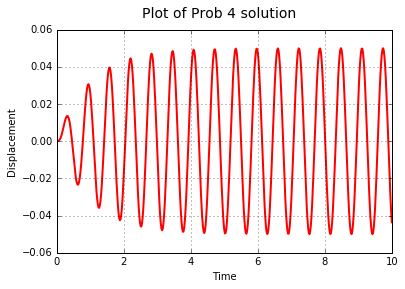

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Numerical solution
m=10
c=20
k=1000
Y=10
dr=10
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(c/m)*x[1] - (k/m)*x[0] + (10/m)*np.sin(10*t)])

time=np.linspace(0.0,100,5000)
xinit=np.array([0, 0])
x=odeint(deriv, xinit, time)

fig = plt.figure()
plt.plot(time, x[:,0] , 'r-', linewidth=2)
#plt.plot(time, 10*np.sin(10*time), 'b-')
fig.suptitle('Plot of Prob 4 solution', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([0, 10, -0.06, 0.06])
plt.grid()
plt.show()

### Problem 5 

**Find frequency response function for the following system.**  

- **$10\ddot{x} + 0.01\dot{x} + 1000x = f(t)$**

<img src="Prob5.png" width="550">

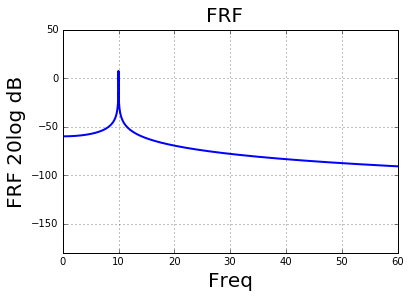

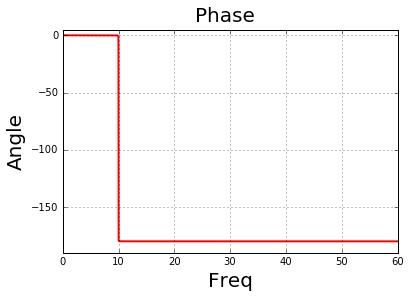

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I=np.sqrt(-1+0j)
w1 = np.linspace(0, 70, 5000)

FRF = 1/(-10*w1**2 + 0.01*w1*I + 1000)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(FRF.real)), 'b-', linewidth=2)

fig.suptitle('FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 60, -180, 50])

plt.grid()
plt.show()

#Next plot the phase:
phase=np.angle(FRF)

fig=plt.figure()
plt.plot(w1, phase*(180/np.pi), 'r-', linewidth=2)

fig.suptitle('Phase', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.axis([0, 60, -190, 5])

plt.grid()
plt.show()

### Problem 6 

**Find frequency response function for the following system.**  

- **$m\ddot{x} + c\dot{x} + kx = c\dot{y}$, where**
- **$y(t) = Ysin(\omega_b t)$**
- **$m = 10,\ c = 1.0,\ k = 10000$**

**Sketch the FRF for range $0\le r \le 5$, where $r = \frac{\omega_{dr}}{\omega_n}$.**  

**Find amplitude and phase shift for the system using following values.**

- **$Y=10,\ f_{dr} = 0$**
- **$Y=2,\ f_{dr} = 5$**
- **$Y=1,\ f_{dr} = 10$**

<img src="Prob6.png" width="550">

<img src="Prob6-1.png" width="550">

In [8]:
omegan = 31.62
m=10
c=1.0
k=10000

freq0 = 2*np.pi*0
freq5 = 2*np.pi*5
freq10 = 2*np.pi*10

e0 = (c*freq0*I)/(-freq0**2*m + c*freq0*I + k)
display(e0)

e5 = (c*freq5*I)/(-freq5**2*m + c*freq5*I + k)
display(e5)

e10 = (c*freq10*I)/(-freq10**2*m + c*freq10*I + k)
display(e10)

0j

(0.054861697625433387+0.22771010464862756j)

(4.543070012853344e-06-0.0021314430260666608j)

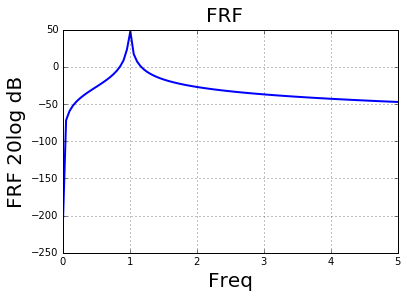

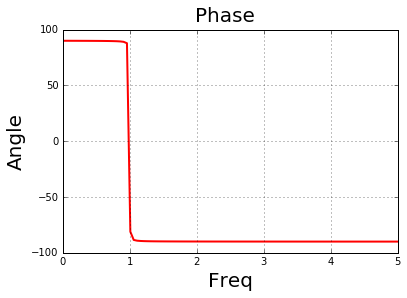

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I=np.sqrt(-1+0j)
w1 = np.linspace(0.001, 70, 100)

omegan = 31.62
m=10
c=1.0

#r=(w1)/(omegan)
r = np.linspace(0.00001, 5, 100)
#print(r)

Z=c/(2*m*omegan)

FRF6 = (2*Z*m*omegan**2*r*I)/((1-r**2) + 2*Z*r*I)

fig=plt.figure()
plt.plot(r, 20*np.log10(abs(FRF6.real)), 'b-', linewidth=2)

fig.suptitle('FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
#plt.axis([0, 60, -180, 50])

plt.grid()
plt.show()

#Next plot the phase:
phase=np.angle(FRF6)

fig=plt.figure()
plt.plot(r, phase*(180/np.pi), 'r-', linewidth=2)

fig.suptitle('Phase', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Angle', fontsize=20)
#plt.axis([0, 5, -185, 5])

plt.grid()
plt.show()

### Problem 15  
**Given $M$ and $K$ matrices below find following quantities:**

- Natural frequency
- Mode shapes
- Mass normalize the mode shapes
- Discuss the natural motions of the mode/frequency pairs

In [10]:
M = sp.Matrix([[2, 0], [0, 3]])
display(M)
K = sp.Matrix([[35, -35], [-35, 35]])
display(K)

⎡2  0⎤
⎢    ⎥
⎣0  3⎦

⎡35   -35⎤
⎢        ⎥
⎣-35  35 ⎦

**Following expression can be used to solve for the eigenvalues:**

**$(M^{-1}K - I\omega^2)\psi = 0$**

In [11]:
# Define inverse of M
Minv=M.inv()
display(Minv)
#Compute determinant
Id = sp.eye(2)
F = Minv*K
display(F)

⎡1/2   0 ⎤
⎢        ⎥
⎣ 0   1/3⎦

⎡35/2   -35/2⎤
⎢            ⎥
⎣-35/3  35/3 ⎦

**Solve for eigenvalues and eigenvectors.**

In [12]:
F.eigenvals()

{0: 1, 175/6: 1}

In [13]:
vals = F.eigenvects()
vals

⎡⎛0, 1, ⎡⎡1⎤⎤⎞, ⎛175/6, 1, ⎡⎡-3/2⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝          ⎣⎣ 1  ⎦⎦⎠⎦

**extract the eigenvalues from above results.**

In [14]:
(eigVal1,n,[vect1]),(eigVal2,n2,[vect2])=vals

In [15]:
eigs=sp.Matrix([[eigVal1, eigVal2]])
eigs

[0  175/6]

In [16]:
v1=sp.Matrix([1, 1])
v1

⎡1⎤
⎢ ⎥
⎣1⎦

**For the above eigenvectors use the Mass Matrix to normalize them.**  

**The procedure for normalizing with respect to the Mass Matrix is outlined below.**  

- Take the square root of matrix $M$.
- Take inverse of the $\sqrt{M}$.
- Multipy the normalized eigenvector $v_1$ or $v_2$ by the inverse of $\sqrt{M}$
- 3 steps above will yield the mass normalized eigenvetor.

In [17]:
t=sp.Matrix(sp.mpmath.sqrtm(M)).T
Msqrt=t.reshape(2,2)
display(Msqrt)
display(Msqrt.inv())

⎡1.4142135623731         0        ⎤
⎢                                 ⎥
⎣       0         1.73205080756888⎦

⎡0.707106781186547          0        ⎤
⎢                                    ⎥
⎣        0          0.577350269189626⎦

**Calculate first mass normalized mode shape.**

In [18]:
c1 = Msqrt.inv()*v1.normalized()
display(c1.evalf(3))
#display(v1.normalized())

⎡ 0.5 ⎤
⎢     ⎥
⎣0.408⎦

**Check that the mass normalized eigenvector $c_1$ is correct by performing calculation $c^{T}_{1}Mc_1 = 1$.**

In [19]:
c1.T*M*c1

[1.0]

**Calculate second mass normalized mode shape.**

In [20]:
v2 = sp.Matrix([-3/2, 1])
v2

⎡-1.5⎤
⎢    ⎥
⎣ 1  ⎦

In [21]:
c2 = Msqrt.inv()*v2.normalized()
display(c2.evalf(3))
#display(v2.normalized())

⎡-0.588⎤
⎢      ⎥
⎣ 0.32 ⎦

**Check that the mass normalized eigenvector $c_2$ is correct by performing calculation $c^{T}_{2}Mc_2 = 1$.**

In [22]:
c2.T*M*c2

[1.0]

**Based on the expression (1.179) in the manuscript the calculated eigenvectors can be put in to the the matrix form where each column of the MATRIX $\Psi$ is comprised of the calculated eigenvectors $c$, where in the manuscript $\psi$ is used in place of $c$.**

In [23]:
Psi=sp.Matrix([c1, c2]).reshape(2,2).T
Psi

⎡                    ___                    ⎤
⎢0.353553390593274⋅╲╱ 2   -0.588348405414552⎥
⎢                                           ⎥
⎢                    ___                    ⎥
⎣0.288675134594813⋅╲╱ 2   0.320256307610174 ⎦

**Define $r_i(t)$ per expression (1.177)**  

**$r_i(t) = a_ie\ ^{j\omega_i t} + \bar{a}_ie^{-j\omega_i t}$**  

**Assume values for $a_1$ and $a_2$, both of which are complex.**  

- $a_1 = 1 + j$, $\bar{a}_1 = 1 - j$
- $a_2 = 2 + j$, $\bar{a}_2 = 2 - j$

**Code below defines $r_i(t)$**

In [24]:
t = sp.Symbol('t', real = True)

a1 = 1 + sp.I
a1bar = 1 - sp.I
a2 = 2 + sp.I
a2bar = 2 - sp.I

r1 = a1*sp.exp(sp.I*0*t) + a1bar*sp.exp(-sp.I*0*t)
r2 = a2*sp.exp(sp.I*((5*sp.sqrt(42))/6)*t) + a2bar*sp.exp(-sp.I*((5*sp.sqrt(42))/6)*t)
r=sp.Matrix([r1, r2])

display(r)

⎡                       2                       ⎤
⎢                                               ⎥
⎢             ____                     ____     ⎥
⎢         5⋅╲╱ 42 ⋅ⅈ⋅t            -5⋅╲╱ 42 ⋅ⅈ⋅t ⎥
⎢         ────────────            ──────────────⎥
⎢              6                        6       ⎥
⎣(2 + ⅈ)⋅ℯ             + (2 - ⅈ)⋅ℯ              ⎦

In [25]:
x = Psi*r
x

⎡                                    ____                                     
⎢                                5⋅╲╱ 42 ⋅ⅈ⋅t                                 
⎢                                ────────────                                 
⎢                                     6                             ___       
⎢- - -0.588348405414552⋅(2 + ⅈ)⋅ℯ             + 0.707106781186547⋅╲╱ 2  - - -0
⎢                                                                             
⎢                                   ____                                      
⎢                               5⋅╲╱ 42 ⋅ⅈ⋅t                                  
⎢                               ────────────                                  
⎢                                    6                             ___        
⎣    0.320256307610174⋅(2 + ⅈ)⋅ℯ             + 0.577350269189626⋅╲╱ 2  + 0.320

                               ____     ⎤
                          -5⋅╲╱ 42 ⋅ⅈ⋅t ⎥
                          ──────────────⎥
    

**Final expression expressed in sin and cos.**

In [26]:
X = x[0]+x[1]
X.expand(complex=True)

                     ⎛    ____  ⎞                             ⎛    ____  ⎞    
                     ⎜5⋅╲╱ 42 ⋅t⎟                             ⎜5⋅╲╱ 42 ⋅t⎟    
0.536184195608755⋅sin⎜──────────⎟ - -1.07236839121751⋅(-1)⋅cos⎜──────────⎟ + 1
                     ⎝    6     ⎠                             ⎝    6     ⎠    

                     
                  ___
.28445705037617⋅╲╱ 2 
                     

**Plot of the response.**

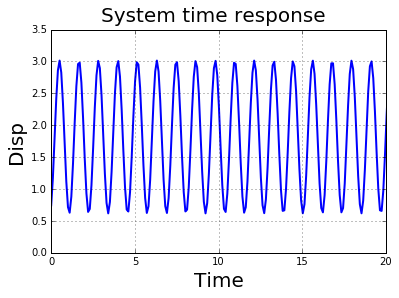

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t1 = np.linspace(0, 50, 500)

P = 0.5361*np.sin((5*t1*np.sqrt(42))/6)-1.072*np.cos((5*t1*np.sqrt(42))/6)+1.2844*np.sqrt(2)

fig=plt.figure()
plt.plot(t1, P, 'b-', linewidth=2)

fig.suptitle('System time response', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Disp', fontsize=20)
plt.axis([0, 20, 0, 3.5])

plt.grid()
plt.show()

**Next find and plot the FRF of the Problem 15.**  
**Start with creating A matrices.**

In [28]:
A1=c1*c1.T
A1

⎡      0.25         0.204124145231932⎤
⎢                                    ⎥
⎣0.204124145231932  0.166666666666667⎦

In [29]:
A2=c2*c2.T
A2

⎡0.346153846153846   -0.188422287906398⎤
⎢                                      ⎥
⎣-0.188422287906398  0.102564102564103 ⎦

**Next define transfer functions, for this problem there is no damping so $\tilde{h_i} = \frac{1}{\omega_i^2-\omega^2}$.**

In [30]:
h15 = sp.Matrix([1/(eigs[0]-omega**2), 1/(eigs[1]-omega**2)])
h15

⎡   -1     ⎤
⎢   ───    ⎥
⎢     2    ⎥
⎢    ω     ⎥
⎢          ⎥
⎢    1     ⎥
⎢──────────⎥
⎢   2   175⎥
⎢- ω  + ───⎥
⎣        6 ⎦

**Define H11.**

In [31]:
H11 = A1[0,0]*h15[0] + A2[0,0]*h15[1]
H11

0.346153846153846   - -0.25 
───────────────── - ────────
       2   175          2   
    - ω  + ───         ω    
            6               

**Define H12.**

In [32]:
H12 = A1[0,1]*h15[0] + A2[0,1]*h15[1]
H12

  - -0.188422287906398    - -0.204124145231932 
- ───────────────────── - ─────────────────────
           2   175                   2         
        - ω  + ───                  ω          
                6                              

**Next plot $H_{11}$ and $H_{12}$.**

C:\Users\ado\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


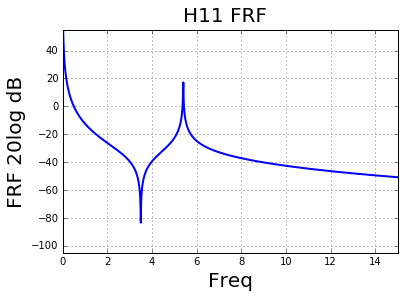

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w1 = np.linspace(0, 70, 5000)

H11FRF = -0.25/(w1**2) + 0.34615/((175/6)-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H11FRF)), 'b-', linewidth=2)

fig.suptitle('H11 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -105, 55])

plt.grid()
plt.show()

### Problem 16  
**Given $M$ and $K$ matrices below find following quantities:**

- Natural frequency
- Mode shapes
- Mass normalize the mode shapes
- Discuss the natural motions of the mode/frequency pairs

In [34]:
M = sp.Matrix([[2, 1, 0], [1, 3, 1], [0, 1, 4]])
display(M)
K = sp.Matrix([[35, -35, 0], [-35, 45, -10], [0, -10, 20]])
display(K)

⎡2  1  0⎤
⎢       ⎥
⎢1  3  1⎥
⎢       ⎥
⎣0  1  4⎦

⎡35   -35   0 ⎤
⎢             ⎥
⎢-35  45   -10⎥
⎢             ⎥
⎣ 0   -10  20 ⎦

**Following expression can be used to solve for the eigenvalues:**

**$(M^{-1}K - I\omega^2)\psi = 0$**

In [35]:
# Define inverse of M
Minv=M.inv()
display(Minv)
#Compute determinant
Id = sp.eye(3)
F = Minv*K
display(F)

⎡ 11             ⎤
⎢ ──   -2/9  1/18⎥
⎢ 18             ⎥
⎢                ⎥
⎢-2/9  4/9   -1/9⎥
⎢                ⎥
⎣1/18  -1/9  5/18⎦

⎡       -575        ⎤
⎢175/6  ─────  10/3 ⎥
⎢         18        ⎥
⎢                   ⎥
⎢-70/3  260/9  -20/3⎥
⎢                   ⎥
⎢       -175        ⎥
⎢35/6   ─────  20/3 ⎥
⎣         18        ⎦

**Next solve for natural frequencies and mode shapes.**  

**For some reason sympy has issues solving for eigenvalues and eigenvectors. Therefore, matrix F above was converted into a numpy Array, which was used to solve for eigenvalues and eigenvectors.**

In [36]:
Fnp = np.array(np.array(F), np.float)
Fnp

array([[ 29.16666667, -31.94444444,   3.33333333],
       [-23.33333333,  28.88888889,  -6.66666667],
       [  5.83333333,  -9.72222222,   6.66666667]])

**Next solve the eigenvalue problem.**

In [37]:
from numpy import linalg as LA
w, v = LA.eig(Fnp)
print(w)
print(v)

[ 57.86800527   0.53143322   6.32278373]
[[-0.73848792  0.66980429 -0.49521107]
 [ 0.64201409  0.63975009 -0.26789489]
 [-0.20604246  0.37693771  0.82643712]]


**Put results into sympy format for further calculations.**

In [38]:
w=sp.Matrix(w)
w.evalf(3)

⎡57.9 ⎤
⎢     ⎥
⎢0.531⎥
⎢     ⎥
⎣6.32 ⎦

In [39]:
v = sp.Matrix(v)
v.evalf(3)

⎡-0.739  0.67   -0.495⎤
⎢                     ⎥
⎢0.642   0.64   -0.268⎥
⎢                     ⎥
⎣-0.206  0.377  0.826 ⎦

In [40]:
v1 = v.col(0)
v2 = v.col(1)
v3 = v.col(2)

**For the above eigenvectors use the Mass Matrix to normalize them.**  

**The procedure for normalizing with respect to the Mass Matrix is outlined below.**  

- Take the square root of matrix $M$.
- Take inverse of the $\sqrt{M}$.
- Multipy the normalized eigenvector $v_1$ or $v_2$ by the inverse of $\sqrt{M}$
- 3 steps above will yield the mass normalized eigenvetor.

In [41]:
t=sp.Matrix(sp.mpmath.sqrtm(M)).T
Msqrt=t.reshape(3,3)
display(Msqrt.evalf(3))
display(Msqrt.inv().evalf(3))

⎡ 1.38    0.33   -0.0271⎤
⎢                       ⎥
⎢ 0.33    1.68    0.276 ⎥
⎢                       ⎥
⎣-0.0271  0.276   1.98  ⎦

⎡0.765   -0.156   0.0322 ⎤
⎢                        ⎥
⎢-0.156   0.642   -0.0915⎥
⎢                        ⎥
⎣0.0322  -0.0915   0.518 ⎦

**Now calculate mass normalized mode shapes.**

In [42]:
v1m = Msqrt.inv()*v1.normalized()
display(v1m.evalf(3))

⎡-0.672⎤
⎢      ⎥
⎢0.546 ⎥
⎢      ⎥
⎣-0.189⎦

In [43]:
v1m.T*M*v1m

[1.0]

### **Next $v_2$**

In [44]:
v2m = Msqrt.inv()*v2.normalized()
display(v2m.evalf(3))

⎡0.425⎤
⎢     ⎥
⎢0.272⎥
⎢     ⎥
⎣0.158⎦

In [45]:
v2m.T*M*v2m

[1.0]

### **Next $v_3$**

In [46]:
v3m = Msqrt.inv()*v3.normalized()
display(v3m.evalf(3))

⎡-0.311⎤
⎢      ⎥
⎢-0.17 ⎥
⎢      ⎥
⎣0.437 ⎦

In [47]:
v3m.T*M*v3m

[1.0]

**Generate matrix Psi of the mass normalized mode shapes.**

In [48]:
Psi=sp.Matrix([v1m, v2m, v3m]).reshape(3,3).T
Psi.evalf(4)

⎡-0.6719  0.4251  -0.3107⎤
⎢                        ⎥
⎢0.5459   0.2717  -0.1703⎥
⎢                        ⎥
⎣-0.1892  0.1583  0.4367 ⎦

**Define $r_i(t)$ per expression (1.177)**  

**$r_i(t) = a_ie\ ^{j\omega_i t} + \bar{a}_ie^{-j\omega_i t}$**  

**Assume values for $a_1$ and $a_2$, both of which are complex.**  

- $a_1 = 1 + j$, $\bar{a}_1 = 1 - j$
- $a_2 = 1.1 + j$, $\bar{a}_2 = 1.1 - j$
- $a_2 = 1.2 + j$, $\bar{a}_2 = 1.2 - j$

**Code below defines $r_i(t)$**

In [49]:
t = sp.Symbol('t', real = True)

a1 = 1 + sp.I
a1bar = 1 - sp.I
a2 = 1.1 + sp.I
a2bar = 1.1 - sp.I
a3 = 1.2 + sp.I
a3bar = 1.2 - sp.I

r1 = a1*sp.exp(sp.I*sp.sqrt(57.87)*t) + a1bar*sp.exp(-sp.I*sp.sqrt(57.87)*t)
r2 = a2*sp.exp(sp.I*sp.sqrt(0.5314)*t) + a2bar*sp.exp(-sp.I*sp.sqrt(0.5314)*t)
r3 = a3*sp.exp(sp.I*sp.sqrt(6.32)*t) + a3bar*sp.exp(-sp.I*sp.sqrt(6.32)*t)

r=sp.Matrix([r1, r2, r3])

display(r)

⎡            -7.60723339986358⋅ⅈ⋅t            7.60723339986358⋅ⅈ⋅t   ⎤
⎢   (1 - ⅈ)⋅ℯ                      + (1 + ⅈ)⋅ℯ                       ⎥
⎢                                                                    ⎥
⎢           -0.728971878744304⋅ⅈ⋅t              0.728971878744304⋅ⅈ⋅t⎥
⎢(1.1 - ⅈ)⋅ℯ                       + (1.1 + ⅈ)⋅ℯ                     ⎥
⎢                                                                    ⎥
⎢            -2.51396101799531⋅ⅈ⋅t              2.51396101799531⋅ⅈ⋅t ⎥
⎣ (1.2 - ⅈ)⋅ℯ                      + (1.2 + ⅈ)⋅ℯ                     ⎦

In [50]:
x = Psi*r
x.evalf(3)

⎡                    -7.60723339986358⋅ⅈ⋅t                       -2.5139610179
⎢(-0.672 + 0.672⋅ⅈ)⋅ℯ                      + (-0.373 + 0.311⋅ⅈ)⋅ℯ             
⎢                                                                             
⎢                        -7.60723339986358⋅ⅈ⋅t                      -2.5139610
⎢  (0.546 - - -0.546⋅ⅈ)⋅ℯ                      + (-0.204 + 0.17⋅ⅈ)⋅ℯ          
⎢                                                                             
⎢                     -7.60723339986358⋅ⅈ⋅t                         -2.5139610
⎣ (-0.189 + 0.189⋅ⅈ)⋅ℯ                      + (0.524 - - -0.437⋅ⅈ)⋅ℯ          

9531⋅ⅈ⋅t                         -0.728971878744304⋅ⅈ⋅t                      0
         + (0.468 - - -0.425⋅ⅈ)⋅ℯ                       + (0.468 + 0.425⋅ⅈ)⋅ℯ 
                                                                              
1799531⋅ⅈ⋅t                         -0.728971878744304⋅ⅈ⋅t                    
            + (0.299 - - -0.272⋅ⅈ)⋅ℯ               

In [51]:
X = x[0]+x[1]+x[2]
X.expand(complex=True).evalf(3)

--1.71⋅(-1)⋅sin(0.728971878744304⋅t) + 0.0886⋅sin(2.51396101799531⋅t) + 0.63⋅s
in(7.60723339986358⋅t) + 1.88⋅cos(0.728971878744304⋅t) - - -0.106⋅cos(2.513961
01799531⋅t) - - -0.63⋅cos(7.60723339986358⋅t)

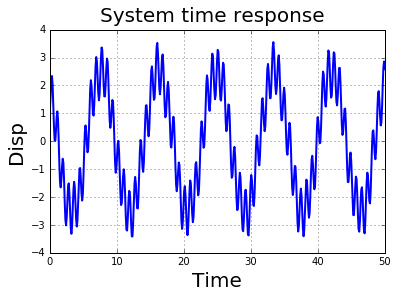

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t1 = np.linspace(0, 50, 500)

P = -1.71*np.sin(0.72897*t1) + 0.0886*np.sin(2.51396*t1) + 0.6304*np.sin(7.60723*t1) +\
        1.88*np.cos(0.72897*t1) - 0.1063*np.cos(2.51396*t1) - 0.6304*np.cos(7.60723*t1)

fig=plt.figure()
plt.plot(t1, P, 'b-', linewidth=2)

fig.suptitle('System time response', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Disp', fontsize=20)
plt.axis([0, 50, -4, 4])

plt.grid()
plt.show()

### Problem 17  
**For system in problem 16 determine $H_{11}$, $H_{12}$, $H_{13}$ using equation (1.213)**

**Plot the FRF for all frequency ranges.**

**Equation (1.213) is $H_{ml} = \Sigma_{i=1}^{n}\ _{i}A_{ml}\tilde{h}_{i}$**  

**Where $_{i}A = \psi_i\otimes\psi_i$**

**A's are calculated below for the 3 eigenvectors (mode shapes).**

**These are also known as the residue.**

In [53]:
A1 = v1m*v1m.T
display(A1.evalf(3))
A2 = v2m*v2m.T
display(A2.evalf(3))
A3 = v3m*v3m.T
display(A3.evalf(3))

⎡0.451   -0.367  0.127 ⎤
⎢                      ⎥
⎢-0.367  0.298   -0.103⎥
⎢                      ⎥
⎣0.127   -0.103  0.0358⎦

⎡0.181   0.115   0.0673⎤
⎢                      ⎥
⎢0.115   0.0738  0.043 ⎥
⎢                      ⎥
⎣0.0673  0.043   0.0251⎦

⎡0.0965  0.0529   -0.136 ⎤
⎢                        ⎥
⎢0.0529   0.029   -0.0744⎥
⎢                        ⎥
⎣-0.136  -0.0744   0.191 ⎦

**Next define $\tilde{h}_i$, they will be placed into a 3 by 1 vectors for easy extraction.**  

**For undamped system $\tilde{h}_i$ is defined as $\tilde{h}_i = \frac{1}{\omega_i^2 - \omega^2}$**

**The required eigenvalues (natural frequencies) are found in vector $w$.**

In [54]:
h=sp.Matrix([1/(w[0]-omega**2), 1/(w[1]-omega**2), 1/(w[2]-omega**2)])
h.evalf(3)

⎡     1      ⎤
⎢─────────── ⎥
⎢   2        ⎥
⎢- ω  + 57.9 ⎥
⎢            ⎥
⎢     1      ⎥
⎢────────────⎥
⎢   2        ⎥
⎢- ω  + 0.531⎥
⎢            ⎥
⎢     1      ⎥
⎢─────────── ⎥
⎢   2        ⎥
⎣- ω  + 6.32 ⎦

**Define $H_{11}$.**

In [55]:
H11 = A1[0,0]*h[0] + A2[0,0]*h[1] + A3[0,0]*h[2]
H11.evalf(3) #evalf() function can be used to round the numbers

   0.451         0.0965        0.181    
─────────── + ─────────── + ────────────
   2             2             2        
- ω  + 57.9   - ω  + 6.32   - ω  + 0.531

**Define $H_{12}$.**

In [56]:
H12 = A1[0,1]*h[0] + A2[0,1]*h[1] + A3[0,1]*h[2]
H12.evalf(3) #evalf() function can be used to round the numbers

   - -0.367        0.0529        0.115    
- ─────────── + ─────────── + ────────────
     2             2             2        
  - ω  + 57.9   - ω  + 6.32   - ω  + 0.531

**Define $H_{13}$.**

In [57]:
H13 = A1[0,2]*h[0] + A2[0,2]*h[1] + A3[0,2]*h[2]
H13.evalf(3) #evalf() function can be used to round the numbers

   0.127       - -0.136        0.0673   
─────────── - ─────────── + ────────────
   2             2             2        
- ω  + 57.9   - ω  + 6.32   - ω  + 0.531

**Plot H11.**

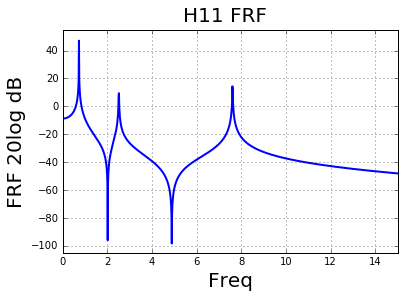

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w1 = np.linspace(0, 70, 5000)

H11FRF = 0.451/(57.9-w1**2) + 0.0965/(6.32-w1**2) + 0.181/(0.531-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H11FRF)), 'b-', linewidth=2)

fig.suptitle('H11 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -105, 55])

plt.grid()
plt.show()

**Plot H12.**

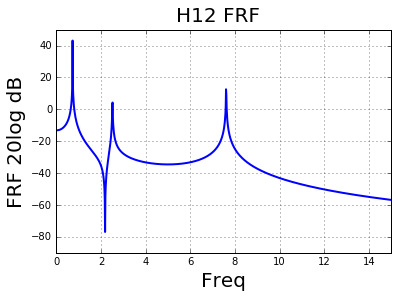

In [59]:
w1 = np.linspace(0, 70, 5000)

H12FRF = -0.367/(57.9-w1**2) + 0.0529/(6.32-w1**2) + 0.115/(0.531-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H12FRF)), 'b-', linewidth=2)

fig.suptitle('H12 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -90, 50])

plt.grid()
plt.show()

**Plot H13.**

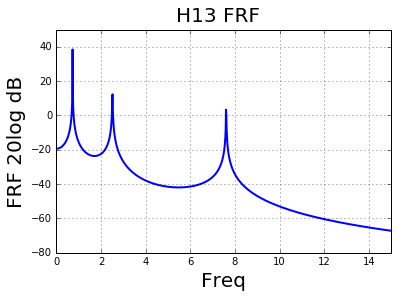

In [60]:
w1 = np.linspace(0, 70, 5000)

H13FRF = 0.127/(57.9-w1**2) - 0.136/(6.32-w1**2) + 0.0673/(0.531-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H13FRF)), 'b-', linewidth=2)

fig.suptitle('H13 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -80, 50])

plt.grid()
plt.show()

### Problem 19  
**For problem 16 with a damping matrix C defined below, determine $H_{11}$, $H_{12}$, $H_{13}$.**  

**Plot FRF including all natural frequencies.**

**$C=\begin{bmatrix}
0.02 & 0.01 & 0.0\\
0.01 & 0.03 & 0.01\\
0.0 & 0.01 & 0.04\\
\end{bmatrix}
$**

In [61]:
C=sp.Matrix([[0.02, 0.01, 0.0], [0.01, 0.03, 0.01], [0.0, 0.01, 0.04]])
C

⎡0.02  0.01  0.0 ⎤
⎢                ⎥
⎢0.01  0.03  0.01⎥
⎢                ⎥
⎣0.0   0.01  0.04⎦

In [62]:
Cdiag = Psi.T*C*Psi
Cdiag

⎡        0.01          -0.00161578974040391  0.000234339603647221⎤
⎢                                                                ⎥
⎢-0.00161578974040391          0.01          -0.00191564961188666⎥
⎢                                                                ⎥
⎣0.000234339603647221  -0.00191564961188666          0.01        ⎦

**For a damped system , frequency response function is defined as:**

**$\tilde{h}_i = \frac{1}{\omega_{i}^{2} + 2\zeta_i\omega_i\omega j - \omega^2}$, where**

**$2\zeta_i\omega_i$ are the diagonals of the diagonalized C matrix.**

**Formed vector if $\tilde{h}_i$ below.**

In [63]:
h=sp.Matrix([1/(w[0] + Cdiag[0,0]*omega*sp.I - omega**2),\
             1/(w[1] + Cdiag[1,1]*omega*sp.I - omega**2),\
             1/(w[2] + Cdiag[2,2]*omega*sp.I - omega**2)])
display(h.evalf(3))

⎡          1            ⎤
⎢────────────────────── ⎥
⎢   2                   ⎥
⎢- ω  + 0.01⋅ⅈ⋅ω + 57.9 ⎥
⎢                       ⎥
⎢           1           ⎥
⎢───────────────────────⎥
⎢   2                   ⎥
⎢- ω  + 0.01⋅ⅈ⋅ω + 0.531⎥
⎢                       ⎥
⎢          1            ⎥
⎢────────────────────── ⎥
⎢   2                   ⎥
⎣- ω  + 0.01⋅ⅈ⋅ω + 6.32 ⎦

**Define $H_{11}$.**

In [64]:
H11 = A1[0,0]*h[0] + A2[0,0]*h[1] + A3[0,0]*h[2]
H11.evalf(3) #evalf() function can be used to round the numbers

        0.451                    0.0965                    0.181         
────────────────────── + ────────────────────── + ───────────────────────
   2                        2                        2                   
- ω  + 0.01⋅ⅈ⋅ω + 57.9   - ω  + 0.01⋅ⅈ⋅ω + 6.32   - ω  + 0.01⋅ⅈ⋅ω + 0.531

**Define $H_{12}$.**

In [65]:
H12 = A1[0,1]*h[0] + A2[0,1]*h[1] + A3[0,1]*h[2]
H12.evalf(3) #evalf() function can be used to round the numbers

        - -0.367                   0.0529                    0.115         
- ────────────────────── + ────────────────────── + ───────────────────────
     2                        2                        2                   
  - ω  + 0.01⋅ⅈ⋅ω + 57.9   - ω  + 0.01⋅ⅈ⋅ω + 6.32   - ω  + 0.01⋅ⅈ⋅ω + 0.531

**Define $H_{13}$.**

In [66]:
H13 = A1[0,2]*h[0] + A2[0,2]*h[1] + A3[0,2]*h[2]
H13.evalf(3) #evalf() function can be used to round the numbers

        0.127                  - -0.136                    0.0673        
────────────────────── - ────────────────────── + ───────────────────────
   2                        2                        2                   
- ω  + 0.01⋅ⅈ⋅ω + 57.9   - ω  + 0.01⋅ⅈ⋅ω + 6.32   - ω  + 0.01⋅ⅈ⋅ω + 0.531

**Plot $H_{11}$**

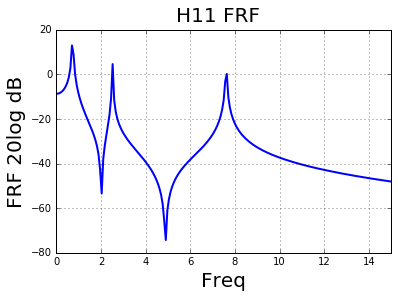

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w1 = np.linspace(0, 70, 1000)

#Define imaginary unit
I=np.sqrt(-1+0j)

H11FRF = 0.451/(57.9+0.01*w1*I-w1**2) + 0.0965/(6.32+0.01*w1*I-w1**2)\
        + 0.181/(0.531+0.01*w1*I-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H11FRF.real)), 'b-', linewidth=2)
#plt.plot(w1, H11FRF.imag, 'r--', linewidth=3)

fig.suptitle('H11 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -80, 20])

plt.grid()
plt.show()

**Plot phase diagram for $H_{11}$.**

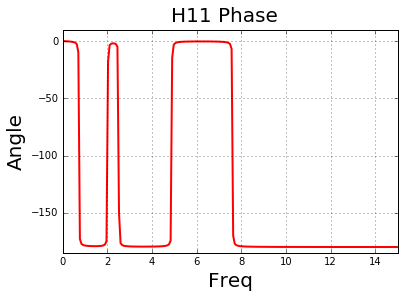

In [68]:
w1 = np.linspace(0, 70, 1000)

#Use phase function to generate angular data
phase=np.angle(H11FRF)

fig=plt.figure()
plt.plot(w1, phase*(180/np.pi), 'r-', linewidth=2)

fig.suptitle('H11 Phase', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.axis([0, 15, -185, 10])

plt.grid()
plt.show()

**Plot $H_{12}$**

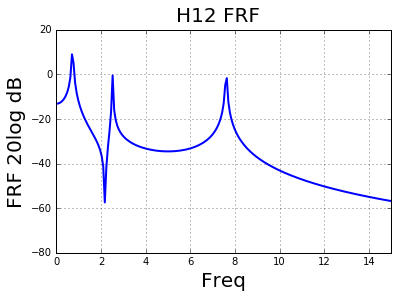

In [69]:
w1 = np.linspace(0, 70, 1000)

#Define imaginary unit
I=np.sqrt(-1+0j)

H12FRF = -0.367/(57.9+0.01*w1*I-w1**2) + 0.0529/(6.32+0.01*w1*I-w1**2)\
        + 0.115/(0.531+0.01*w1*I-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H12FRF.real)), 'b-', linewidth=2)
#plt.plot(w1, H11FRF.imag, 'r--', linewidth=3)

fig.suptitle('H12 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -80, 20])

plt.grid()
plt.show()

**Plot phase diagram for $H_{12}$.**

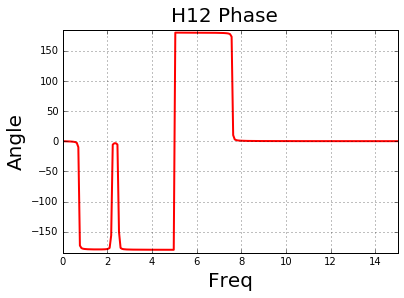

In [70]:
w1 = np.linspace(0, 70, 1000)

#Use phase function to generate angular data
phase=np.angle(H12FRF)

fig=plt.figure()
plt.plot(w1, phase*(180/np.pi), 'r-', linewidth=2)

fig.suptitle('H12 Phase', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.axis([0, 15, -185, 185])

plt.grid()
plt.show()

**Plot $H_{13}$**

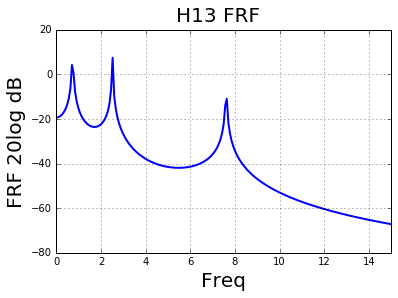

In [71]:
w1 = np.linspace(0, 70, 1000)

#Define imaginary unit
I=np.sqrt(-1+0j)

H13FRF = 0.127/(57.9+0.01*w1*I-w1**2) - 0.136/(6.32+0.01*w1*I-w1**2)\
        + 0.0673/(0.531+0.01*w1*I-w1**2)

fig=plt.figure()
plt.plot(w1, 20*np.log10(abs(H13FRF.real)), 'b-', linewidth=2)
#plt.plot(w1, H11FRF.imag, 'r--', linewidth=3)

fig.suptitle('H13 FRF', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('FRF 20log dB', fontsize=20)
plt.axis([0, 15, -80, 20])

plt.grid()
plt.show()

**Plot phase diagram for $H_{13}$.**

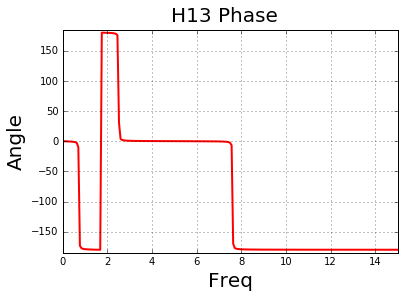

In [72]:
w1 = np.linspace(0, 70, 1000)

#Use phase function to generate angular data
phase=np.angle(H13FRF)

fig=plt.figure()
plt.plot(w1, phase*(180/np.pi), 'r-', linewidth=2)

fig.suptitle('H13 Phase', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.axis([0, 15, -185, 185])

plt.grid()
plt.show()

### Problem 20  
**Determine the zeros of the system of problem 16 for $H_{11}$, $H_{12}$, $H_{13}$.**

**To calculate the zeros need to construc adjoint for following cases $(1,1)$, $(1,2)$, $(1,3)$. After that determinant equation is used to solve for the zeros. Pertinent equations are seen below.**

**$adj_{i\ j}(K - \omega^2 M)$, where the indicies in question are (1,1), (1,2), (1,3).** 

**Next get the determinant and solve for zeros.**

In [73]:
M = sp.Matrix([[2, 1, 0], [1, 3, 1], [0, 1, 4]])
display(M)
K = sp.Matrix([[35, -35, 0], [-35, 45, -10], [0, -10, 20]])
display(K)
C=sp.Matrix([[0.02, 0.01, 0.0], [0.01, 0.03, 0.01], [0.0, 0.01, 0.04]])
display(C)

⎡2  1  0⎤
⎢       ⎥
⎢1  3  1⎥
⎢       ⎥
⎣0  1  4⎦

⎡35   -35   0 ⎤
⎢             ⎥
⎢-35  45   -10⎥
⎢             ⎥
⎣ 0   -10  20 ⎦

⎡0.02  0.01  0.0 ⎤
⎢                ⎥
⎢0.01  0.03  0.01⎥
⎢                ⎥
⎣0.0   0.01  0.04⎦

**Zeros for $H_{11}$ case:**

In [74]:
M11 = sp.Matrix([[2, 1, 0], [1, 3, 1], [0, 1, 4]])
M11.row_del(0)
M11.col_del(0)
display(M11)
K11 = sp.Matrix([[35, -35, 0], [-35, 45, -10], [0, -10, 20]])
K11.row_del(0)
K11.col_del(0)
display(K11)
C11=sp.Matrix([[0.02, 0.01, 0.0], [0.01, 0.03, 0.01], [0.0, 0.01, 0.04]])
C11.row_del(0)
C11.col_del(0)
display(C11)

⎡3  1⎤
⎢    ⎥
⎣1  4⎦

⎡45   -10⎤
⎢        ⎥
⎣-10  20 ⎦

⎡0.03  0.01⎤
⎢          ⎥
⎣0.01  0.04⎦

In [75]:
Z11 = K11.T + C11.T*omega*sp.I - M11.T*omega**2
display(Z11)
z11_det = Z11.det()
z11_det

⎡     2                      2                 ⎤
⎢- 3⋅ω  + 0.03⋅ⅈ⋅ω + 45   - ω  + 0.01⋅ⅈ⋅ω - 10 ⎥
⎢                                              ⎥
⎢    2                        2                ⎥
⎣ - ω  + 0.01⋅ⅈ⋅ω - 10   - 4⋅ω  + 0.04⋅ⅈ⋅ω + 20⎦

    4              3                   2                
11⋅ω  - - -0.22⋅ⅈ⋅ω  - -260.0011⋅(-1)⋅ω  + 2.6⋅ⅈ⋅ω + 800

### Zeros

In [76]:
sp.solve(z11_det, omega**2)

⎡⎧ 2                  ⎫  ⎧ 2                  ⎫⎤
⎢⎨ω : 3.63634141430739⎬, ⎨ω : 20.0001222220562⎬⎥
⎣⎩                    ⎭  ⎩                    ⎭⎦

**Zeros for $H_{12}$ case:**

In [77]:
M12 = sp.Matrix([[2, 1, 0], [1, 3, 1], [0, 1, 4]])
M12.row_del(0)
M12.col_del(1)
display(M12)
K12 = sp.Matrix([[35, -35, 0], [-35, 45, -10], [0, -10, 20]])
K12.row_del(0)
K12.col_del(1)
display(K12)
C12=sp.Matrix([[0.02, 0.01, 0.0], [0.01, 0.03, 0.01], [0.0, 0.01, 0.04]])
C12.row_del(0)
C12.col_del(1)
display(C12)

⎡1  1⎤
⎢    ⎥
⎣0  4⎦

⎡-35  -10⎤
⎢        ⎥
⎣ 0   20 ⎦

⎡0.01  0.01⎤
⎢          ⎥
⎣0.0   0.04⎦

In [78]:
Z12 = K12.T + C12.T*omega*sp.I - M12.T*omega**2
display(Z12)
z12_det = Z12.det()
z12_det

⎡   2                                        ⎤
⎢- ω  + 0.01⋅ⅈ⋅ω - 35            0           ⎥
⎢                                            ⎥
⎢   2                       2                ⎥
⎣- ω  + 0.01⋅ⅈ⋅ω - 10  - 4⋅ω  + 0.04⋅ⅈ⋅ω + 20⎦

   4              3             2                      
4⋅ω  - - -0.08⋅ⅈ⋅ω  + 119.9996⋅ω  - -1.2⋅(-1)⋅ⅈ⋅ω - 700

### Zeros

In [79]:
sp.solve(z12_det, omega**2)

⎡⎧ 2                   ⎫  ⎧ 2                  ⎫⎤
⎢⎨ω : -34.9999125000273⎬, ⎨ω : 5.00001250002734⎬⎥
⎣⎩                     ⎭  ⎩                    ⎭⎦

**Zeros for $H_{13}$ case:**

In [80]:
M13 = sp.Matrix([[2, 1, 0], [1, 3, 1], [0, 1, 4]])
M13.row_del(0)
M13.col_del(2)
display(M13)
K13 = sp.Matrix([[35, -35, 0], [-35, 45, -10], [0, -10, 20]])
K13.row_del(0)
K13.col_del(2)
display(K13)
C13=sp.Matrix([[0.02, 0.01, 0.0], [0.01, 0.03, 0.01], [0.0, 0.01, 0.04]])
C13.row_del(0)
C13.col_del(2)
display(C13)

⎡1  3⎤
⎢    ⎥
⎣0  1⎦

⎡-35  45 ⎤
⎢        ⎥
⎣ 0   -10⎦

⎡0.01  0.03⎤
⎢          ⎥
⎣0.0   0.01⎦

In [81]:
Z13 = K13.T + C13.T*omega*sp.I - M13.T*omega**2
display(Z13)
z13_det = Z13.det()
z13_det

⎡    2                                       ⎤
⎢ - ω  + 0.01⋅ⅈ⋅ω - 35            0          ⎥
⎢                                            ⎥
⎢     2                     2                ⎥
⎣- 3⋅ω  + 0.03⋅ⅈ⋅ω + 45  - ω  + 0.01⋅ⅈ⋅ω - 10⎦

 4              3            2                    
ω  - - -0.02⋅ⅈ⋅ω  + 44.9999⋅ω  - - -0.45⋅ⅈ⋅ω + 350

### Zeros

In [82]:
sp.solve(z13_det, omega**2)

⎡⎧ 2                  ⎫  ⎧ 2                  ⎫⎤
⎢⎨ω : -34.999859999776⎬, ⎨ω : -10.000040000224⎬⎥
⎣⎩                    ⎭  ⎩                    ⎭⎦

### For problem 21 see solution for 17. Residues were calculated there.

### Problem 22  
**There is a MDOF system at rest with following values**

- **$\omega_1 = 3 \frac{rad}{sec}$**
- **$\omega_2 = 10 \frac{rad}{sec}$**

**$\Psi=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1\\
\end{bmatrix}
$**

**$F(t)=\begin{bmatrix}
\frac{1}{\sqrt{2}}\delta (t)\\
\frac{1}{\sqrt{2}}\delta (t)\\
\end{bmatrix}
$**

**Find $x(t)$**

**First construct $\tilde{H}$ and $H$ from the corresponding $\tilde{h}_i$.**

In [83]:
Psi = (1/sp.sqrt(2))*sp.Matrix([[1, 1], [1, -1]])
display(Psi)
h1 = sp.nsimplify(1/(3**2-omega**2))
display(h1)
h2 = sp.nsimplify(1/(10**2-omega**2))
display(h2)

⎡  ___     ___ ⎤
⎢╲╱ 2    ╲╱ 2  ⎥
⎢─────   ───── ⎥
⎢  2       2   ⎥
⎢              ⎥
⎢  ___     ___ ⎥
⎢╲╱ 2   -╲╱ 2  ⎥
⎢─────  ───────⎥
⎣  2       2   ⎦

   1    
────────
   2    
- ω  + 9

    1     
──────────
   2      
- ω  + 100

In [84]:
Htilde = sp.Matrix([[h1, 0], [0, h2]])
display(Htilde)
H = Psi*Htilde*Psi.T
display(H)

⎡   1                ⎤
⎢────────      0     ⎥
⎢   2                ⎥
⎢- ω  + 9            ⎥
⎢                    ⎥
⎢              1     ⎥
⎢   0      ──────────⎥
⎢             2      ⎥
⎣          - ω  + 100⎦

⎡       1               1                 1               1      ⎤
⎢ ────────────── + ────────────   - ────────────── + ────────────⎥
⎢   ⎛   2      ⎞     ⎛   2    ⎞       ⎛   2      ⎞     ⎛   2    ⎞⎥
⎢ 2⋅⎝- ω  + 100⎠   2⋅⎝- ω  + 9⎠     2⋅⎝- ω  + 100⎠   2⋅⎝- ω  + 9⎠⎥
⎢                                                                ⎥
⎢        1               1               1               1       ⎥
⎢- ────────────── + ────────────   ────────────── + ──────────── ⎥
⎢    ⎛   2      ⎞     ⎛   2    ⎞     ⎛   2      ⎞     ⎛   2    ⎞ ⎥
⎣  2⋅⎝- ω  + 100⎠   2⋅⎝- ω  + 9⎠   2⋅⎝- ω  + 100⎠   2⋅⎝- ω  + 9⎠ ⎦

**Put forcing function F(t) into frequency domain.**

In [85]:
#Testing out fourier transform capabilities for sympy in this block of code.
from sympy import DiracDelta
#DiracDelta(t)
sp.fourier_transform((1/sp.sqrt(2))*DiracDelta(t), t, k)

  ___
╲╱ 2 
─────
  2  

In [86]:
f=(1/sp.sqrt(2))*sp.Matrix([[DiracDelta(t)], [DiracDelta(t)]])
display(f)
F=(1/sp.sqrt(2))*sp.Matrix([[1], [1]])
display(F)

⎡  ___              ⎤
⎢╲╱ 2 ⋅DiracDelta(t)⎥
⎢───────────────────⎥
⎢         2         ⎥
⎢                   ⎥
⎢  ___              ⎥
⎢╲╱ 2 ⋅DiracDelta(t)⎥
⎢───────────────────⎥
⎣         2         ⎦

⎡  ___⎤
⎢╲╱ 2 ⎥
⎢─────⎥
⎢  2  ⎥
⎢     ⎥
⎢  ___⎥
⎢╲╱ 2 ⎥
⎢─────⎥
⎣  2  ⎦

In [87]:
X = H*F
X.expand()

⎡     ___    ⎤
⎢   ╲╱ 2     ⎥
⎢────────────⎥
⎢  ⎛   2    ⎞⎥
⎢2⋅⎝- ω  + 9⎠⎥
⎢            ⎥
⎢     ___    ⎥
⎢   ╲╱ 2     ⎥
⎢────────────⎥
⎢  ⎛   2    ⎞⎥
⎣2⋅⎝- ω  + 9⎠⎦

**Sympy has issues taking inverse fourier transform of the expression $X(j\omega)$. Therefore, the inverse operation was carried out matlab and following results were obtained.**  

- **$x_1 = \frac{\sqrt{2}}{12}sin(3t)$**
- **$x_2 = \frac{\sqrt{2}}{12}sin(3t)$**

In [88]:
from sympy.abc import k
sp.inverse_fourier_transform(X[1], k, t)

0

### Problem 25  
**Find mode shape from following matrix**  

**$_1 A = \psi_1 \psi_1^T=\begin{bmatrix}
0.0845 & 0.00357 & 0.27811\\
0.00357 & 0.00015 & 0.01175\\
0.27811 & 0.01175 & 0.91535
\end{bmatrix}
$**

**In index notation outer product can be expressed as $\psi_{i} \psi_{j}$. From this it is evident that the values of vector $\psi$ are easily found on the diagonal of matrix $A$. Where $A_{11} = \psi_1 \psi_1$. Therefore to get the $1^{st}$, $2^{nd}$, $3^{rd}$ values of $\psi_1$ following is accomplished.**  

- **$\psi_1^1$ = $\sqrt{A_{11}}$**
- **$\psi_1^2$ = $\sqrt{A_{22}}$**
- **$\psi_1^3$ = $\sqrt{A_{33}}$**

In [89]:
psi = sp.Matrix([sp.sqrt(0.0845), sp.sqrt(0.00015), sp.sqrt(0.91535)])
psi.evalf(4)

⎡0.2907 ⎤
⎢       ⎥
⎢0.01225⎥
⎢       ⎥
⎣0.9567 ⎦

**Confirm the result for $\psi_1$.**

In [90]:
(psi*psi.T).evalf(4)

⎡0.0845   0.00356  0.2781 ⎤
⎢                         ⎥
⎢0.00356  0.00015  0.01172⎥
⎢                         ⎥
⎣0.2781   0.01172  0.9154 ⎦

In [91]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [92]:
x=sp.Symbol('x', real=True)

In [96]:
sp.integrate(x, (x, 0, 2))

2

In [98]:
sp.diff(x**3, x, 2)

6⋅x